In [610]:
# import 
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



- 맥북 한글 폰트 사용

In [611]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'

mpl.rcParams['axes.unicode_minus'] = False

- 데이터 로드
- 데이터 확인

In [ ]:

df = pd.read_csv('./data/before_scaling.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   fromCity      315 non-null    int64
 1   sex           315 non-null    int64
 2   age           315 non-null    int64
 3   famMore3      315 non-null    int64
 4   liveTogether  315 non-null    int64
 5   Medu          315 non-null    int64
 6   Fedu          315 non-null    int64
 7   noParent      315 non-null    int64
 8   traveltime    315 non-null    int64
 9   studytime     315 non-null    int64
 10  failures      315 non-null    int64
 11  schoolsup     315 non-null    int64
 12  famsup        315 non-null    int64
 13  paid          315 non-null    int64
 14  activities    315 non-null    int64
 15  nursery       315 non-null    int64
 16  higher        315 non-null    int64
 17  internet      315 non-null    int64
 18  romantic      315 non-null    int64
 19  famrel        315 non-null   

,fromCity,sex,age,famMore3,liveTogether,Medu,Fedu,noParent,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,315.000000,315.00000,315.000000,315.000000,315.000000,315.00000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.822222,0.48254,16.476190,0.714286,0.885714,2.84127,2.571429,0.066667,1.368254,2.069841,...,3.971429,3.225397,3.079365,1.450794,2.298413,3.577778,6.609524,11.295238,11.450794,11.622222
std,0.382934,0.50049,1.203196,0.452473,0.318664,1.07084,1.078367,0.249841,0.651511,0.845489,...,0.871968,1.004761,1.107323,0.885098,1.313755,1.401597,8.535234,3.246528,3.141051,3.241866
min,0.000000,0.00000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,1.000000,0.00000,16.000000,0.000000,1.000000,2.00000,2.000000,0.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.500000
50%,1.000000,0.00000,16.000000,1.000000,1.000000,3.00000,3.000000,0.000000,1.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,1.00000,17.000000,1.000000,1.000000,4.00000,3.500000,0.000000,2.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,9.000000,14.000000,14.000000,14.000000
max,1.000000,1.00000,22.000000,1.000000,1.000000,4.00000,4.000000,1.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 결측치 확인

In [613]:
# 결측치 확인
df_null = df.isnull().sum()
print("컬럼별 결측치 개수:\n", df_null)

컬럼별 결측치 개수:
 fromCity        0
sex             0
age             0
famMore3        0
liveTogether    0
Medu            0
Fedu            0
noParent        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64


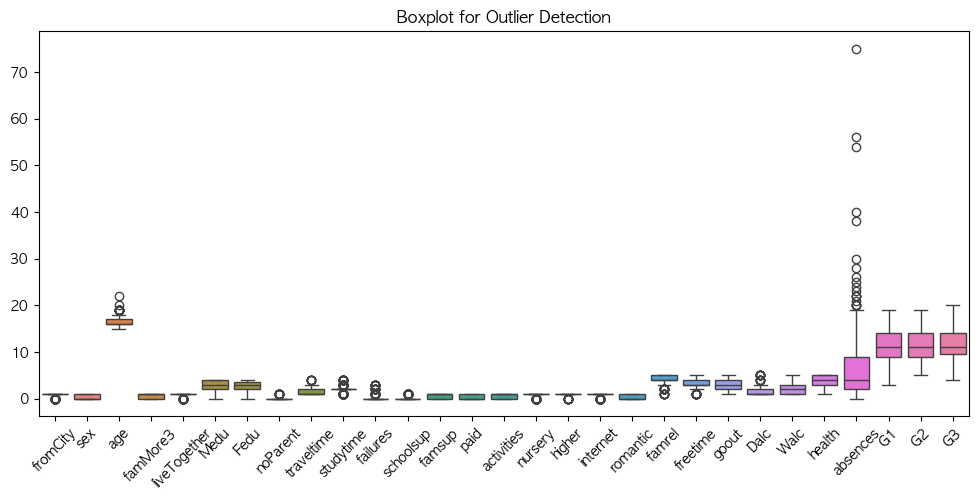

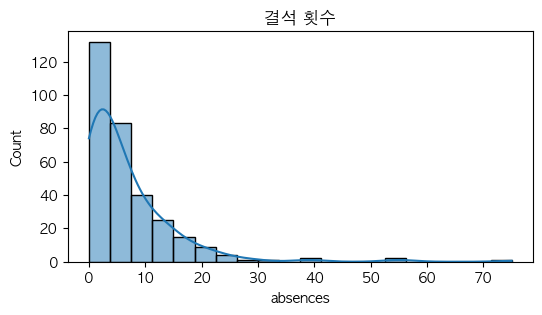

In [ ]:
# 수치형 컬럼만 선택
num_cols = df.select_dtypes(include=['int64','float64']).columns

# 박스플롯으로 이상치 확인
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


plt.figure(figsize=(6,3))
sns.histplot(df['absences'], bins=20, kde=True)
plt.title("결석 횟수")
plt.show()


### 결석 이상치 확인

In [615]:
absences = df ['absences']

print(absences.describe())

count    315.000000
mean       6.609524
std        8.535234
min        0.000000
25%        2.000000
50%        4.000000
75%        9.000000
max       75.000000
Name: absences, dtype: float64


In [616]:
G3 = df['G3']

print(G3.describe())
G3

count    315.000000
mean      11.622222
std        3.241866
min        4.000000
25%        9.500000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


0       6
1       6
2      10
3      15
4      10
       ..
310    10
311    14
312    16
313     9
314    15
Name: G3, Length: 315, dtype: int64

#### 결석 50번 이상도 가능하기 때문에 제거하지 않음

### 01_성적과 결석의 관계성

In [617]:
features_1 = ["studytime", "absences"]
target = "G3"

- 공부 시간과 결석을 묶어 G3 지표 확인 위해 컬럼 및 타겟 생성

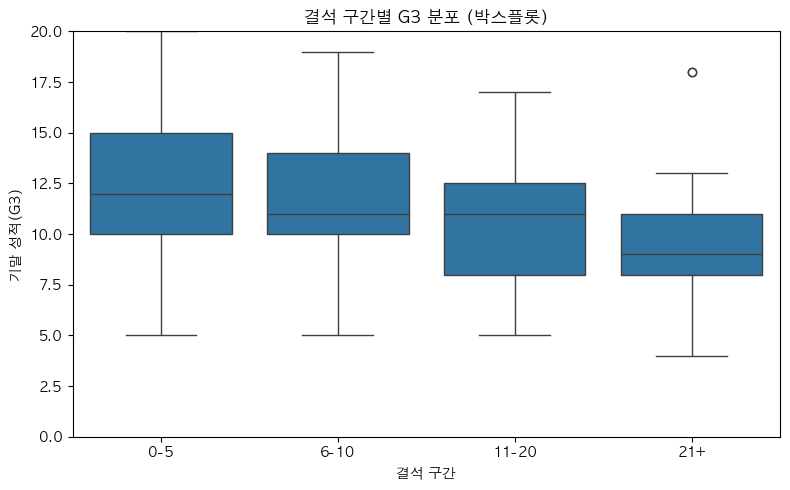

In [ ]:

bins = [-1, 5, 10, 20, df["absences"].max()]
labels = ["0-5", "6-10", "11-20", "21+"]
df["abs_band"] = pd.cut(df["absences"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.boxplot(x="abs_band", y="G3", data=df, order=labels)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

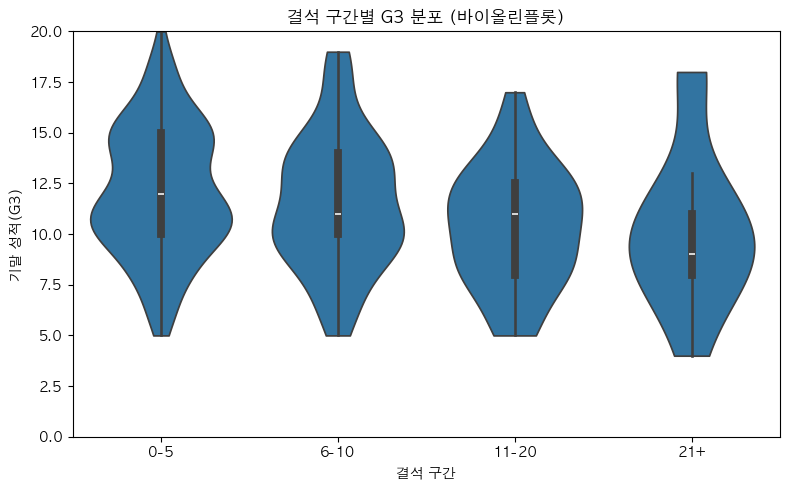

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="abs_band", y="G3", data=df, order=labels, inner="box", cut=0)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

- 박스플롯과 바이올린플롯을 활용해 데이터 시각화
=> 결석량이 적은 학생이 성적이 높은 것을 확인할 수 있음

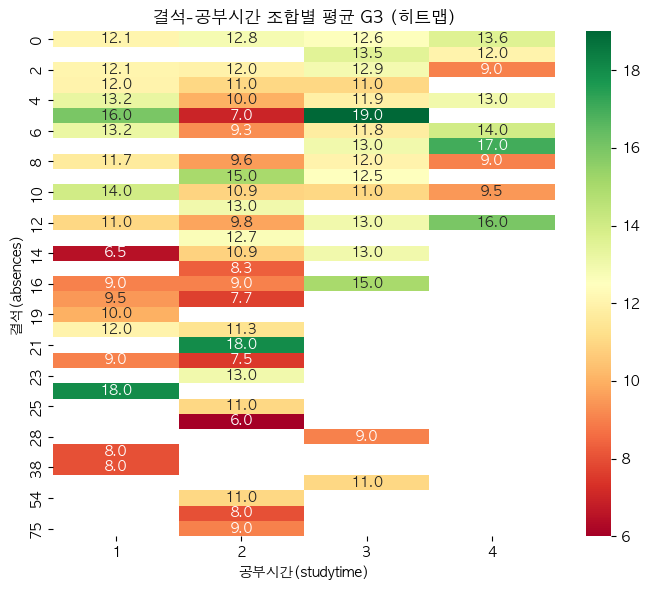

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_data = df.pivot_table(
    values="G3", index="absences", columns="studytime", aggfunc="mean"
)

plt.figure(figsize=(7,6))
sns.heatmap(pivot_data, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title("결석-공부시간 조합별 평균 G3")
plt.xlabel("공부시간(studytime)")
plt.ylabel("결석(absences)")
plt.tight_layout()
plt.show()


두 변수의 상호작용 효과 확인 가능

결석이 적을수록 점수가 높고, 공부시간이 늘수록 더 높아지는 조합 효과를 색상으로 한눈에 볼 수 있음.

예: 결석 ↓ + 공부시간 ↑ 구간이 가장 진한 녹색 → 성적이 가장 높은 조합

최적 조건 도출 가능

예: 공부시간 3단계, 결석 0~5회 → G3 평균 15점 이상

이런 식으로 정책 제안용 근거로 쓸 수 있음.

리스크 구간도 바로 보임

예: 결석 20회↑ + 공부시간 1단계 → 평균 7점 이하

학습 개입 필요 학생군을 식별할 수 있음.

“이 히트맵을 보면 공부시간을 늘려도 결석이 많으면 효과가 제한적이라는 걸 알 수 있다.”

“반대로 결석이 적다면 공부시간 증가 효과가 더 크게 나타난다.”

→ 즉, 결석 관리가 우선, 그다음이 공부시간 확보라는 전략적 메시지를 줄 수 있음.

### 2. 생활 습관과 성적의 관계성

In [621]:
features_life = ["freetime", "goout", "Dalc", "Walc"]
target = "G3"


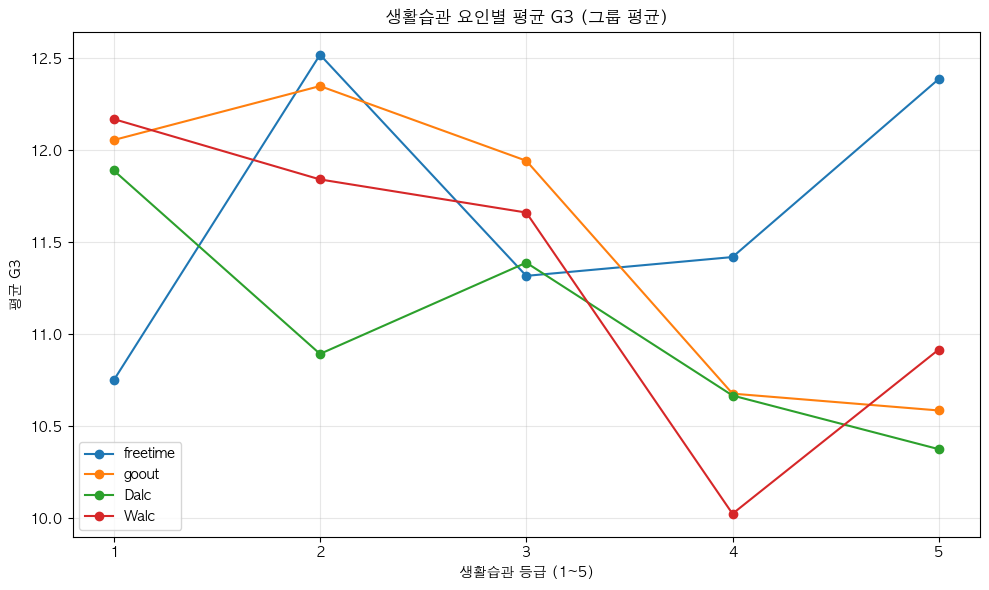

In [ ]:
plt.figure(figsize=(10,6))
levels = [1,2,3,4,5]
for var in features_life:
    means = df.groupby(var)[target].mean().reindex(levels)
    plt.plot(levels, means.values, marker="o", label=var)

plt.xticks(levels)
plt.xlabel("생활습관 등급 (1~5)")
plt.ylabel("평균 G3")
plt.title("생활습관 요인별 평균 G3 (그룹 평균)")
plt.grid(alpha=.3)
plt.legend()
plt.tight_layout()
plt.show()


1. 생활습관별 성적 변화 패턴 확인

- freetime(자유 시간):

    등급 2에서 가장 높은 성적을 보이고, 4등급에서 낮아졌다가 5등급에서 다시 상승.

    자유 시간이 적당할 때 성적이 높고, 너무 많거나 너무 적으면 성적이 낮아질 가능성을 시사.

- goout(외출 빈도):

    낮은 등급에서는 비교적 성적이 높지만, 3~5등급에서는 점차 하락.

    외출이 많아질수록 성적이 낮아질 가능성을 보여줌.

- Dalc(평일 음주) & Walc(주말 음주):

    전반적으로 등급이 높아질수록 성적이 하락하는 경향이 강함.

    음주 빈도 증가가 성적 저하와 연관될 수 있음을 시사.

2. 인사이트

- 적정 수준의 균형:
자유 시간과 외출 빈도는 너무 많거나 적을 때 성적이 낮아질 수 있으므로, 중간 수준의 균형이 성적 향상에 도움이 될 가능성.

- 위험 요인 탐색:
음주(Dalc, Walc)는 거의 선형적으로 성적 저하와 연결되는 모습을 보임.
→ 위험 요인 관리의 필요성을 시사.

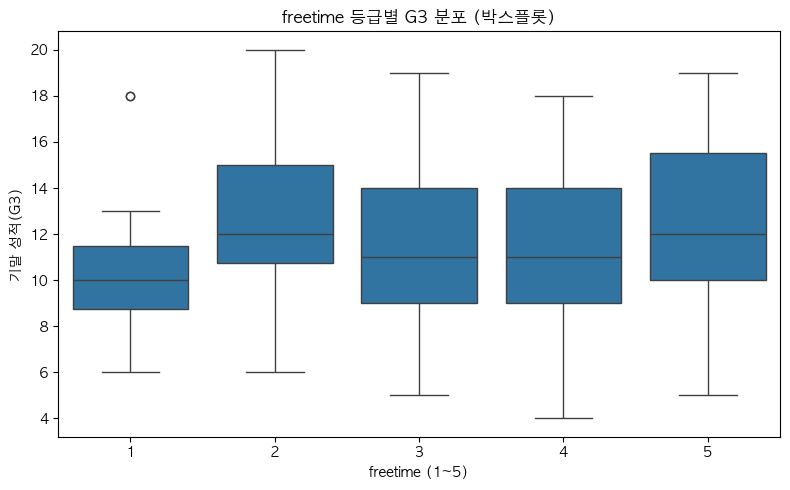

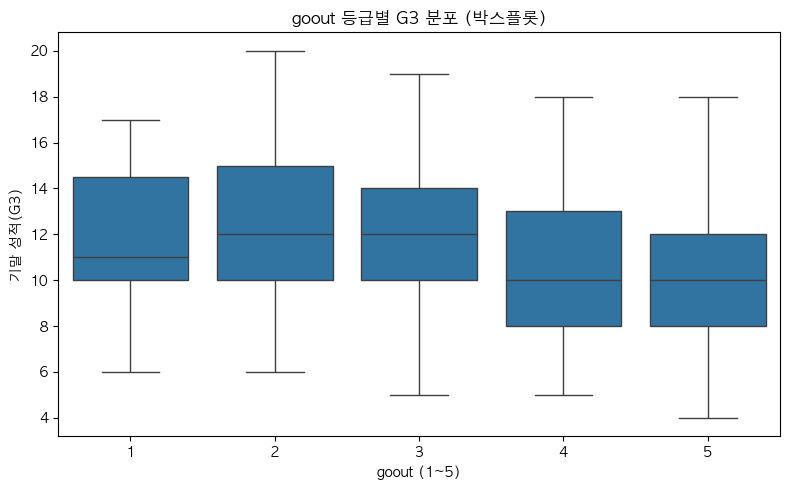

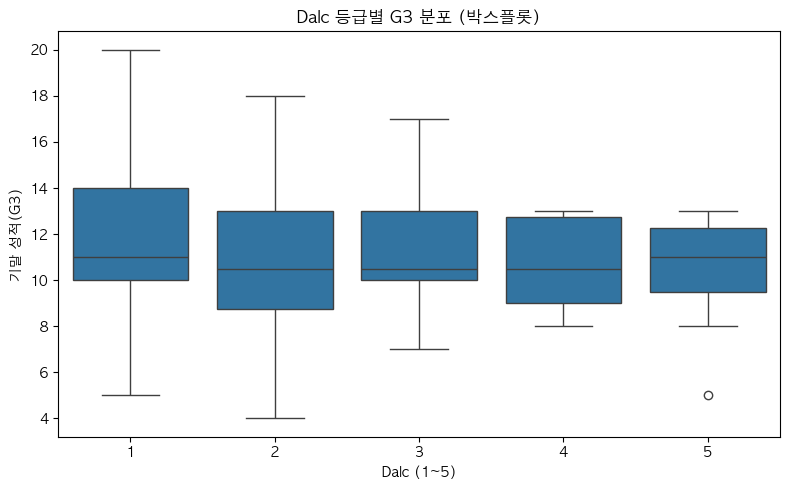

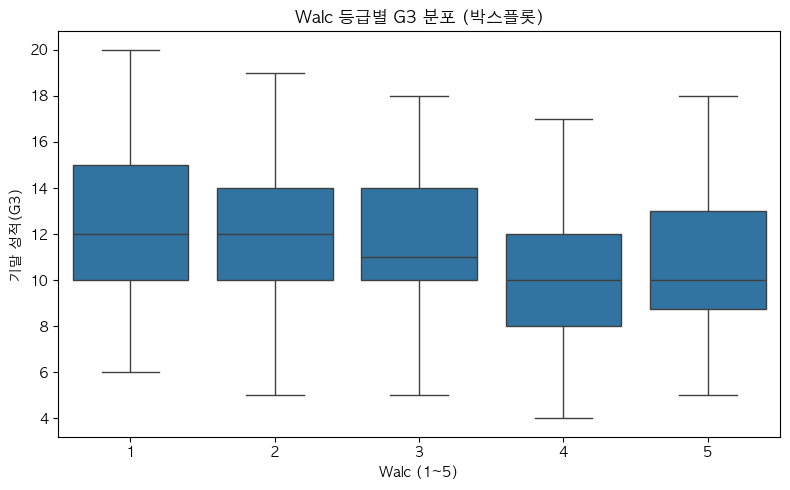

In [ ]:

# 2) 분포 확인 (박스플롯)

for var in features_life:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=var, y=target, data=df, order=levels)
    plt.xlabel(f"{var} (1~5)")
    plt.ylabel("기말 성적(G3)")
    plt.title(f"{var} 등급별 G3 분포 (박스플롯)")
    plt.tight_layout()
    plt.show()

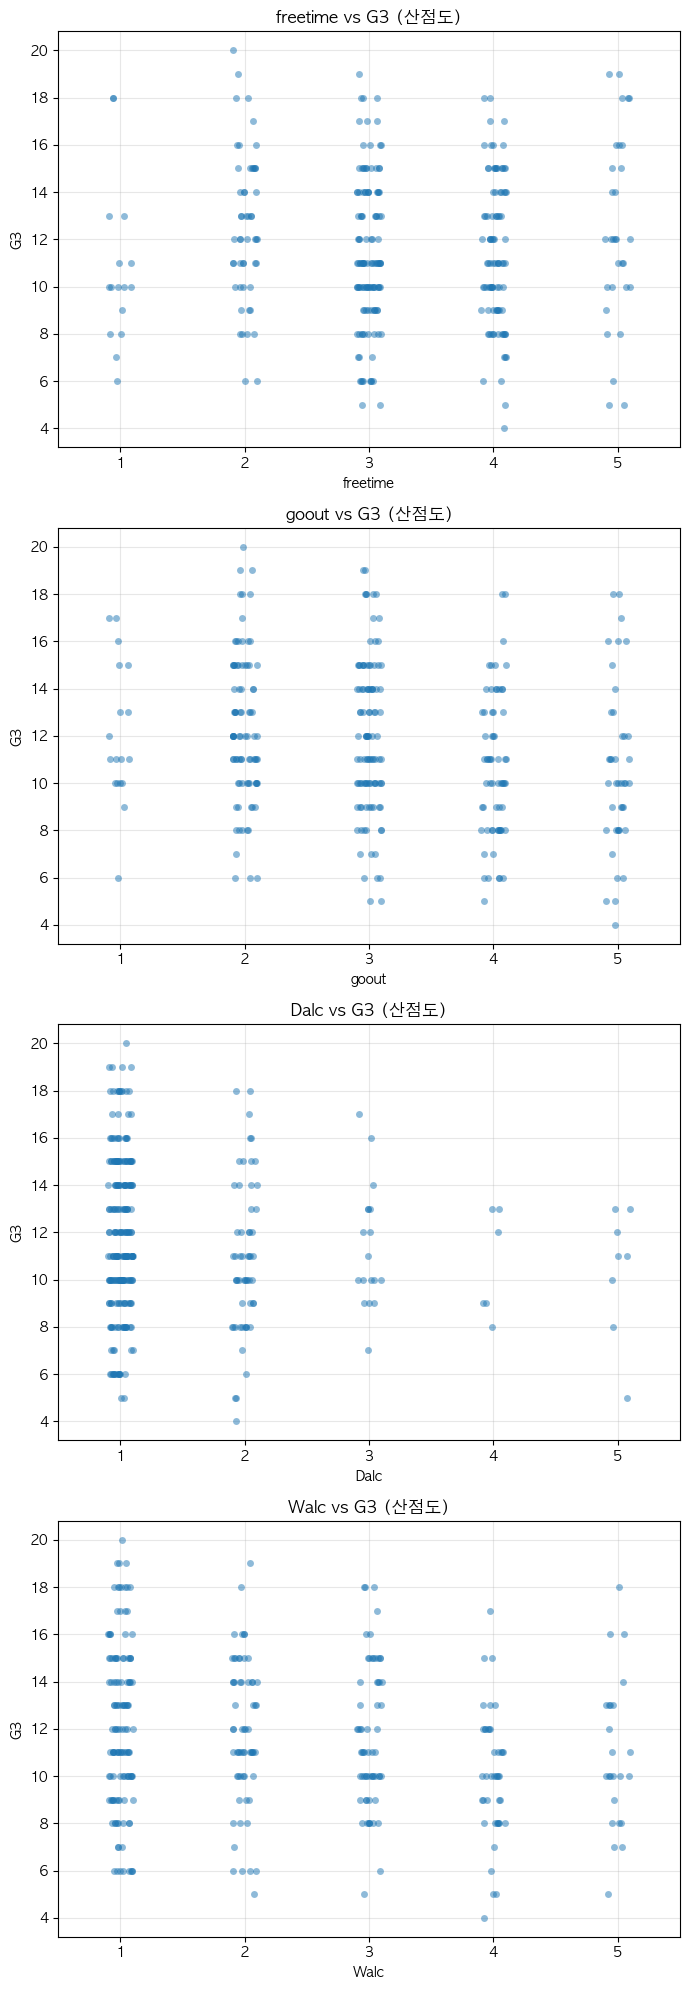

In [626]:
import seaborn as sns
import matplotlib.pyplot as plt

features_life = ["freetime", "goout", "Dalc", "Walc"]
target = "G3"
levels = [1, 2, 3, 4, 5]

# 서브플롯 생성
fig, axes = plt.subplots(len(features_life), 1, figsize=(7, 5*len(features_life)), sharey=True)

for i, var in enumerate(features_life):
    sns.stripplot(x=var, y=target, data=df, order=levels, alpha=0.5, jitter=True, ax=axes[i])
    axes[i].set_title(f"{var} vs G3 (산점도)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("G3")
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 변수별로 한 장씩 박스플롯으로 그려본 지표

1. 공통적으로 보이는 특징

- 중앙값(Median)
    대부분 1~2 구간에서 G3 중앙값이 가장 높거나 유지되는 경향이 있음
    → 술, 사교, 여가 활동이 너무 높을수록 성적이 낮아질 수 있음

- 분포 폭(Spread)
    3~5 구간에서 G3 분포 폭이 넓어져 성적 편차가 커짐
    → 활동이 많아질수록 성적 관리가 어려워지고, 상위권·하위권 격차가 커질 수 있음

- 이상치(Outliers)
    특히 1, 5 구간에서 성적이 극단적으로 높은 학생 존재
    → 활동이 많아도 자기 관리가 가능하면 성적 유지 가능

2. 변수별 세부 해석

- Walc (주말 음주)	1~2 구간에서 중앙값이 가장 높고, 3~5 구간에서 점차 하락	과도한 음주는 성적에 부정적 영향을 줄 가능성

- Dalc (평일 음주)	1~3 구간은 안정적, 4~5 구간에서 약간 하락 경향	평일 음주 습관이 과도할수록 성적 하락 가능성 존재

- goout (사교 활동)	1~2 구간에서 중앙값이 높고 4~5 구간에서 감소 경향	적절한 사교 활동은 긍정적, 과도하면 성적 하락 가능성

- freetime (자유 시간)	1~2 구간에서 성적이 높고 4~5 구간에서 하락 경향	자유 시간이 너무 많으면 공부 시간 부족 위험 존재

3. 종합 결론

- 균형 잡힌 생활습관이 성적에 긍정적
    → 여가·사교·음주 활동이 너무 많지도, 너무 적지도 않은 1~2 레벨에서 성적이 가장 안정적

- 포화 지점(Threshold)
    → 레벨 3 이상에서는 성적 중앙값이 뚜렷하게 하락 → 관리 한계점으로 해석 가능

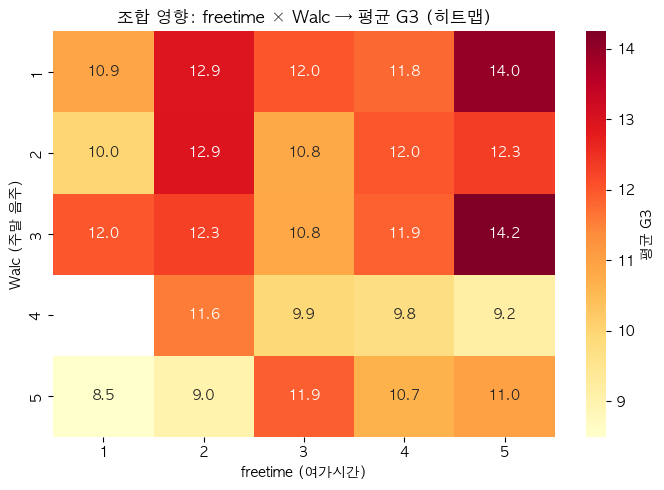

In [624]:
pivot_freetime_walc = (
    df.pivot_table(
        index="Walc", columns="freetime", values=target, aggfunc="mean"
    )
    .reindex(index=levels, columns=levels)
)

plt.figure(figsize=(7,5))
sns.heatmap(pivot_freetime_walc, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={"label": "평균 G3"})
plt.xlabel("freetime (여가시간)")
plt.ylabel("Walc (주말 음주)")
plt.title("조합 영향: freetime × Walc → 평균 G3 (히트맵)")
plt.tight_layout()
plt.show()


| Walc (주말 음주) | freetime 1 | freetime 2 | freetime 3 | freetime 4 | freetime 5 | 관찰 포인트                        |
| ------------ | ---------- | ---------- | ---------- | ---------- | ---------- | ----------------------------- |
| 1            | 10.9       | **12.9**   | 12.0       | 11.8       | **14.0**   | 낮은 음주 + 적절한 여가 → 성적 상위 유지     |
| 2            | 10.0       | **12.9**   | 10.8       | 12.0       | 12.3       | 여가 2\~4 구간 안정적 성적, 극단값 없음     |
| 3            | **12.0**   | **12.3**   | 10.8       | 11.9       | **14.2**   | 음주 중간 레벨이지만 여가 5 레벨에서도 높은 성적  |
| 4            | 11.6       | 9.9        | 9.8        | 9.8        | 9.2        | **음주가 4 이상**이면 모든 여가 레벨 성적 급락 |
| 5            | 8.5        | 9.0        | 11.9       | 10.7       | 11.0       | 일부 구간에서 회복 있으나 전반적 성적 저하      |


## 3. 부모 학력과 학생 성적의 관계성

In [627]:
features_family = ["Medu", "Fedu", "famsup"]
target = "G3"

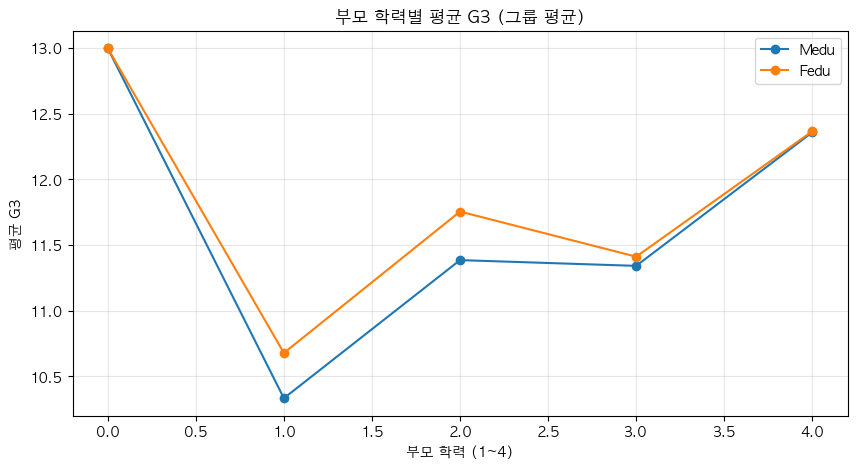

In [628]:
plt.figure(figsize=(10,5))
for var in ["Medu", "Fedu"]:
    means = df.groupby(var)[target].mean()
    plt.plot(means.index, means.values, marker="o", label=var)

plt.xlabel("부모 학력 (1~4)")
plt.ylabel("평균 G3")
plt.title("부모 학력별 평균 G3 (그룹 평균)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

| 부모 학력 등급 | 평균 G3 (Medu) | 평균 G3 (Fedu) | 관찰 포인트                           |
| -------- | ------------ | ------------ | -------------------------------- |
| 0        | **13.0**     | **13.0**     | 데이터 특이값 가능성 → 학력 0과 성적 관계 재확인 필요 |
| 1        | 10.3         | 10.7         | 학력 1 구간에서 성적 평균 가장 낮음            |
| 2        | 11.4         | 11.8         | 2\~3 구간은 소폭 상승, 큰 차이는 없음         |
| 3        | 11.4         | 11.4         | 학력 3 → 4 구간에서 성적 상승이 두드러짐        |
| 4        | **12.4**     | **12.4**     | 학력 4에서 성적 평균이 가장 높음              |


/var/folders/c9/p13f04296p7b3qgrj_bd6y0r0000gn/T/ipykernel_48589/3440469597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Medu", y="G3", data=df, palette="Set1", size=4)


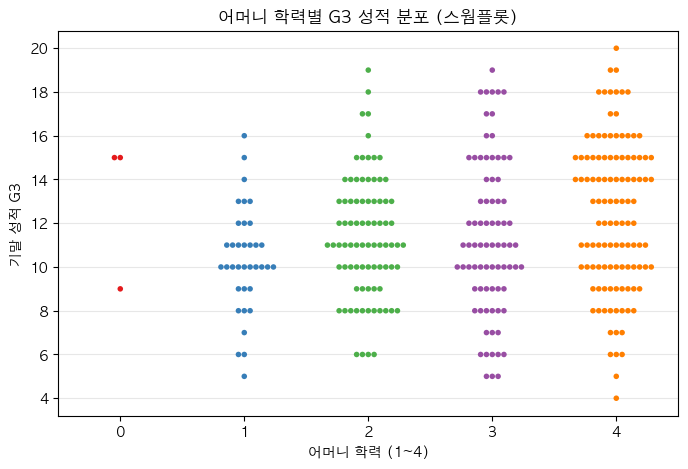

In [633]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="Medu", y="G3", data=df, palette="Set1", size=4)
plt.xlabel("어머니 학력 (1~4)")
plt.ylabel("기말 성적 G3")
plt.title("어머니 학력별 G3 성적 분포 (스웜플롯)")
plt.grid(axis="y", alpha=0.3)
plt.show()


/var/folders/c9/p13f04296p7b3qgrj_bd6y0r0000gn/T/ipykernel_48589/4030528512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Fedu", y="G3", data=df, palette="Set2", size=4)


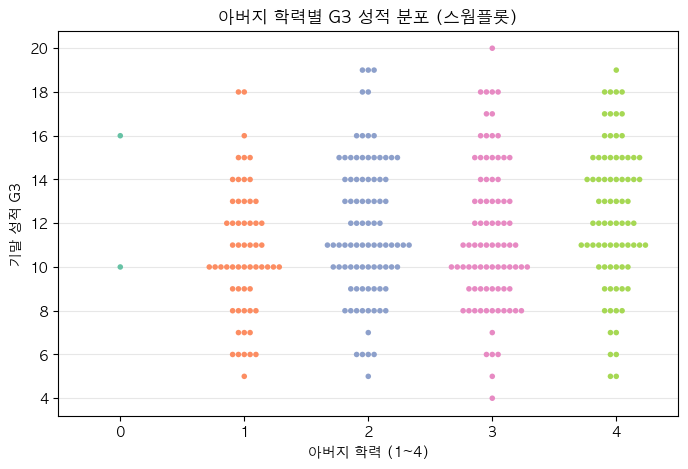

In [632]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="Fedu", y="G3", data=df, palette="Set2", size=4)
plt.xlabel("아버지 학력 (1~4)")
plt.ylabel("기말 성적 G3")
plt.title("아버지 학력별 G3 성적 분포 (스웜플롯)")
plt.grid(axis="y", alpha=0.3)
plt.show()


1. 아버지 학력별 G3 성적 분포

- 학력이 1~2 수준일 때 성적 분포가 상대적으로 넓고, 중간 점수대(10~12점) 학생이 많음.

- 학력이 3~4 수준으로 높아질수록 성적이 12점 이상인 학생 비율이 증가하고, 특히 15점 이상 고득점 학생들이 늘어남.

- 그러나 4 수준에서도 여전히 10점 이하 학생들이 존재 → 부모 학력 외 요인도 성적에 영향을 줌.

2. 어머니 학력별 G3 성적 분포

- 전반적으로 아버지 학력과 유사한 패턴이 나타남.

- 어머니 학력이 3~4 수준일 때 고득점 학생 비율이 가장 많고 성적이 상위권으로 밀집되는 경향이 두드러짐.

- 반대로 학력이 1 이하일 경우 성적이 넓게 분산되고 중하위권 학생이 많음.

/var/folders/c9/p13f04296p7b3qgrj_bd6y0r0000gn/T/ipykernel_48589/2622053111.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="famsup", y="G3", data=df, ci=95)


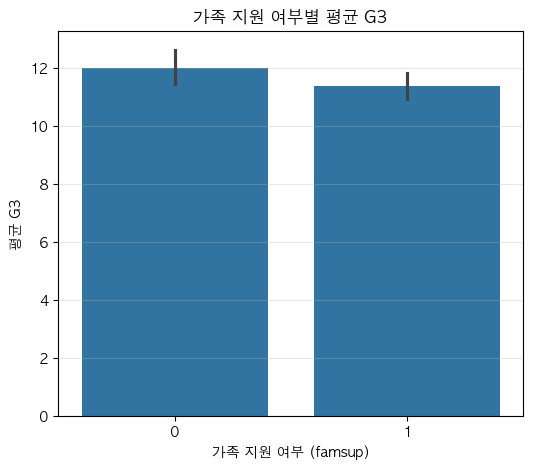

In [631]:
plt.figure(figsize=(6,5))
sns.barplot(x="famsup", y="G3", data=df, ci=95)
plt.xlabel("가족 지원 여부 (famsup)")
plt.ylabel("평균 G3")
plt.title("가족 지원 여부별 평균 G3")
plt.grid(axis="y", alpha=0.3)
plt.show()


그래프 해석

- famsup = 0 → 가족 지원이 없는 학생 그룹

- famsup = 1 → 가족 지원이 있는 학생 그룹

그래프를 보면:

- 가족 지원이 없는 학생(famsup=0)의 평균 G3는 약 12점

- 가족 지원이 있는 학생(famsup=1)의 평균 G3는 약 11.5점

    즉, 가족 지원 여부에 따른 성적 차이가 크지 않음을 알 수 있습니다.

해석 포인트

- 차이가 거의 없음

- 가족 지원 여부만으로는 성적에 유의미한 차이를 만들지 못한 것으로 보임.

- 다른 요인과의 상호작용 필요

- 부모 학력, 생활 습관, 결석률 등과 조합 효과를 함께 봐야 실질적인 영향을 파악 가능.

결론

- 가족 지원 여부는 단독 요인으로는 성적 차이를 크게 설명하지 못함.

    하지만 다른 요인과의 조합을 보면 부분적으로 성적 격차가 나타날 가능성이 있으므로 추가 분석이 필요함.

4. 건강과 학업의 관계성

In [ ]:

features_health = ["health"]
target = "G3"


   health  G3
0       3   6
1       3   6
2       3  10
3       5  15
4       5  10


/var/folders/c9/p13f04296p7b3qgrj_bd6y0r0000gn/T/ipykernel_48589/769768117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="health", y="G3", data=df, palette="Set2", size=4)


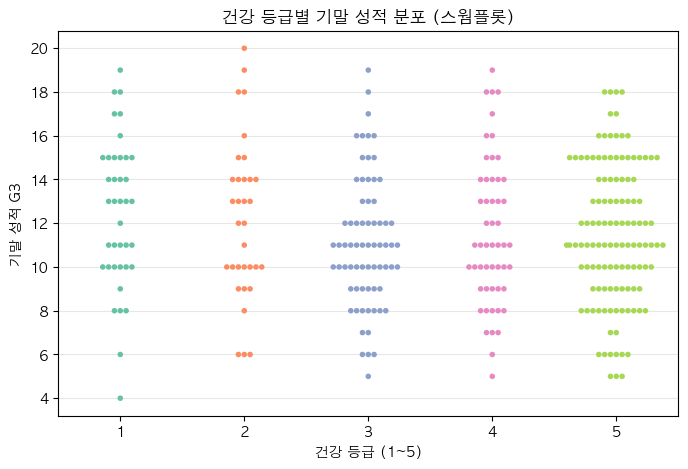

In [640]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="health", y="G3", data=df, palette="Set2", size=4)
plt.xlabel("건강 등급 (1~5)")
plt.ylabel("기말 성적 G3")
plt.title("건강 등급별 기말 성적 분포 (스웜플롯)")
plt.grid(axis="y", alpha=0.3)
plt.show()

그래프 해석

- x축: 건강 등급(1 = 매우 나쁨 ~ 5 = 매우 좋음)

- y축: 기말 성적(G3) 점수

- 점 분포: 각 등급별 학생들의 실제 성적 분포

주요 관찰 포인트:

- 건강 등급 1~2:

    일부 학생은 높은 성적(15~20점)을 받았지만, 전반적으로 분포가 넓고 성적 편차가 큼.

    건강이 낮다고 해서 반드시 성적이 낮은 것은 아니지만, 안정적이지 않음.

- 건강 등급 3:

    성적 분포가 8~15점 사이에 집중되어 있고, 성적이 평균 수준에 가까움.

    건강이 중간 정도일 때 성적이 가장 고르게 분포.

- 건강 등급 4~5:

    성적이 10~15점 사이에 다수 분포하지만, 높은 성적(15점 이상) 학생 수도 존재.

    다만, 건강이 높다고 해서 성적이 반드시 최고로 오르는 것은 아님.

해석 포인트

    건강 상태가 너무 낮으면 학업 성취도가 불안정해질 가능성이 있음.

    하지만 건강이 높다고 해서 성적이 선형적으로 비례해 증가하지 않음 → 포화 현상 가능성.

    성적은 건강 외의 요인(학습 시간, 가정환경 등)과 함께 종합적으로 평가해야 의미 있음.

결론

    건강이 낮을수록 성적이 불안정해지는 경향이 있으나,

    일정 수준 이상의 건강에서는 성적 향상 효과가 둔화됨.

    즉, 최적 건강 구간은 3~4등급으로 보이며,
    너무 낮거나 높을 때는 성취도에 큰 차이가 없음을 시사함.